# **Análisis de Demanda y Precio de la Electricidad en Italia**

En este notebook vamos a realizar un análisis de la **demanda** y los **precios de la electricidad** en diversas zonas de Italia. El DataFrame contiene datos históricos de consumo de electricidad y precios en diferentes regiones italianas. Las unidades de medida de los datos son las siguientes:

- **Demanda de electricidad** en **megavatios hora (MWh)**.
- **Precios de la electricidad** en **euros por megavatio hora (€/MWh)**.
  
Este análisis nos permitirá explorar las tendencias y patrones relacionados con la demanda y los precios de la electricidad a lo largo del tiempo y en distintas zonas.

¡Comencemos! 

In [34]:
# importamos la librerias
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
# vamos a cargar el nuevo dataframe cargado en el csv DEMANDA_PRECIOS.csv

df = pd.read_csv('DEMANDA_PRECIOS.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87671 entries, 0 to 87670
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   87671 non-null  object 
 1   ITALIA_DEMAND          87671 non-null  float64
 2   CNOR_DEMAND            87671 non-null  float64
 3   CSUD_DEMAND            87671 non-null  float64
 4   NORD_DEMAND            87671 non-null  float64
 5   SARD_DEMAND            87671 non-null  float64
 6   SICI_DEMAND            87671 non-null  float64
 7   SUD_DEMAND             87671 non-null  float64
 8   YEAR                   87671 non-null  int64  
 9   MONTH                  87671 non-null  object 
 10  SEASON                 87671 non-null  object 
 11  TIME_OF_DAY            87671 non-null  object 
 12  UNIQUE_NATIONAL_PRICE  87671 non-null  float64
 13  UNCONSTRAINED_PRICE    87671 non-null  float64
 14  NORD_CENTER_PRICE      87671 non-null  float64
 15  SU

# Análisis de Precios de la Electricidad

En este análisis, hemos formulado algunas preguntas clave sobre los **precios de la electricidad** en las diferentes zonas de Italia. A continuación, planteamos las preguntas que vamos a abordar utilizando **Python** para extraer las respuestas de los datos:

### Sobre precios:
1. ¿En qué año los precios de la electricidad fueron más altos en cada zona (NORD, SARD, SICI, SUD, etc.)?
2. ¿Cuál ha sido la tendencia de los precios en cada zona a lo largo de los años? (¿Están subiendo o bajando?)
3. ¿Qué mes del año suele tener los precios más altos en cada zona?
4. ¿En qué estación del año (invierno, verano, etc.) los precios son más altos?
5. ¿A qué hora del día (mañana, tarde, noche) los precios suelen ser más altos?
6. ¿Qué zona tiene el precio promedio más alto y cuál el más bajo a lo largo de todos los años?
7. ¿Cómo se relaciona el precio único nacional con los precios por zona? (¿Son similares o hay grandes diferencias?)

In [36]:
# PREGUNTA 1 1.	¿En qué año los precios de la electricidad fueron más altos en cada zona (NORD, SARD, SICI, SUD, etc.)?

# Crear un diccionario para las zonas de precios
zonas_precio = ['NORD_PRICE', 'SARDINA_PRICE', 'SICILY_PRICE', 'SUD_PRICE']

# Crear un DataFrame vacío para almacenar los resultados
resultados = {}

# Iterar sobre las zonas de precio y encontrar el año con el precio más alto
for zona in zonas_precio:
    # Agrupar por año y obtener el valor máximo para cada año
    precios_maximos = df.groupby('YEAR')[zona].max()
    # Encontrar el año en que el precio fue más alto
    anio_max = precios_maximos.idxmax()
    # Obtener el precio máximo correspondiente a ese año
    precio_max = precios_maximos.max()
    # Almacenar el resultado
    resultados[zona] = {'Año': anio_max, 'Precio máximo': precio_max}

# Convertir los resultados en un DataFrame
resultados_df = pd.DataFrame.from_dict(resultados, orient='index')

# Crear un mensaje para mostrar los resultados
mensaje = f"Análisis de los precios máximos de electricidad por zona:\n\n"

# Añadir los resultados al mensaje
for zona, datos in resultados.items():
    mensaje += f"Zona: {zona.replace('_', ' ').title()}\n"
    mensaje += f"Año con el precio más alto: {datos['Año']}\n"
    mensaje += f"Precio máximo en ese año: {datos['Precio máximo']:.2f} €/MWh\n\n"

# Mostrar el mensaje por consola
print(mensaje)

Análisis de los precios máximos de electricidad por zona:

Zona: Nord Price
Año con el precio más alto: 2021
Precio máximo en ese año: 555.00 €/MWh

Zona: Sardina Price
Año con el precio más alto: 2021
Precio máximo en ese año: 533.19 €/MWh

Zona: Sicily Price
Año con el precio más alto: 2012
Precio máximo en ese año: 3000.00 €/MWh

Zona: Sud Price
Año con el precio más alto: 2021
Precio máximo en ese año: 533.19 €/MWh




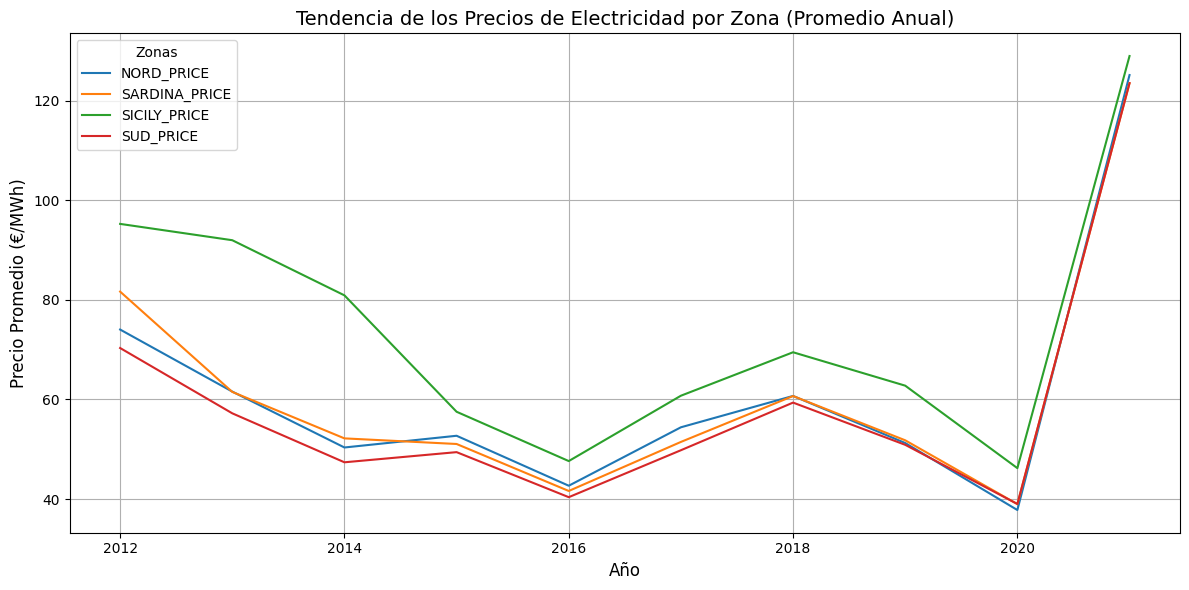

In [37]:
# PREGUNTA 2 ¿Cuál ha sido la tendencia de los precios en cada zona a lo largo de los años? (¿Están subiendo o bajando?)

# Calcular el promedio anual para cada zona
tendencias = {}
for zona in zonas_precio:
    promedio_anual = df.groupby('YEAR')[zona].mean()
    tendencias[zona] = promedio_anual

# Crear un DataFrame a partir de las tendencias
tendencias_df = pd.DataFrame(tendencias)

# Graficar las tendencias
plt.figure(figsize=(12, 6))
for zona in zonas_precio:
    plt.plot(tendencias_df.index, tendencias_df[zona], label=zona)

# Personalizar el gráfico
plt.title("Tendencia de los Precios de Electricidad por Zona (Promedio Anual)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Precio Promedio (€/MWh)", fontsize=12)
plt.legend(title="Zonas")
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [38]:
# PREGUNTA 3 3.	¿Qué mes del año suele tener los precios más altos en cada zona?

# Crear un diccionario para almacenar los resultados por zona
resultados_meses = {}

# Iterar sobre las zonas de precios
for zona in zonas_precio:
    # Agrupar por mes y calcular el promedio de los precios
    precios_por_mes = df.groupby('MONTH')[zona].mean()
    # Encontrar el mes con el precio más alto
    mes_max = precios_por_mes.idxmax()
    # Obtener el precio promedio más alto
    precio_max = precios_por_mes.max()
    # Almacenar el resultado
    resultados_meses[zona] = {'Mes': mes_max, 'Precio promedio más alto': precio_max}

# Convertir los resultados en un DataFrame para mejor visualización
resultados_meses_df = pd.DataFrame.from_dict(resultados_meses, orient='index')

# Mostrar los resultados
print("Resultados por mes para cada zona:")
print(resultados_meses_df)

Resultados por mes para cada zona:
                    Mes  Precio promedio más alto
NORD_PRICE     December                 81.987348
SARDINA_PRICE  December                 79.098060
SICILY_PRICE   December                 89.062563
SUD_PRICE      December                 77.226637


C:\Users\febbr\AppData\Local\Temp\ipykernel_18776\2167354071.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precios_por_mes = df.groupby('MONTH')[zona].mean()


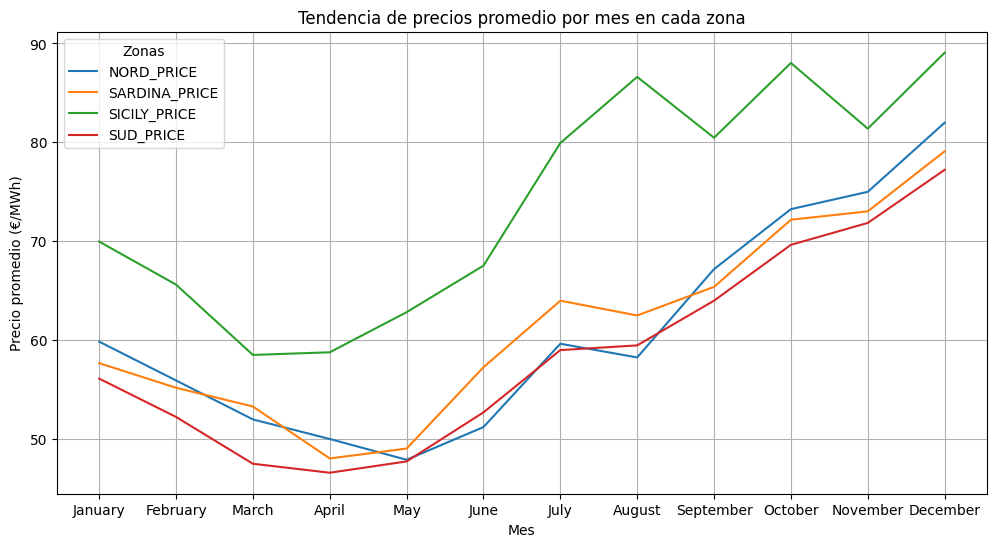

In [39]:
# Crear una lista con el orden correcto de los meses
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convertir la columna 'MONTH' a un tipo categórico con el orden correcto
df['MONTH'] = pd.Categorical(df['MONTH'], categories=orden_meses, ordered=True)

# Crear un gráfico de líneas para las zonas de precio
plt.figure(figsize=(12, 6))
for zona in zonas_precio:
    precios_por_mes = df.groupby('MONTH')[zona].mean()
    plt.plot(precios_por_mes.index, precios_por_mes.values, label=zona)

# Configuración del gráfico
plt.title('Tendencia de precios promedio por mes en cada zona')
plt.xlabel('Mes')
plt.ylabel('Precio promedio (€/MWh)')
plt.legend(title="Zonas")
plt.grid(True)
plt.show()

In [ ]:
# PREGUNTA 4 ¿En qué estación del año (invierno, verano, etc.) los precios son más altos?
resultados_estaciones = {}

# Iterar sobre las zonas de precio y encontrar la estación con el precio promedio más alto
for zona in zonas_precio:
    # Agrupar por estación y calcular el promedio de los precios
    precios_estaciones = df.groupby('SEASON')[zona].mean()
    # Encontrar la estación con el precio promedio más alto
    estacion_max = precios_estaciones.idxmax()
    # Obtener el precio promedio más alto correspondiente a esa estación
    precio_max = precios_estaciones.max()
    # Almacenar el resultado
    resultados_estaciones[zona] = {'Estación': estacion_max, 'Precio promedio más alto': precio_max}

# Convertir los resultados en un DataFrame
resultados_estaciones_df = pd.DataFrame.from_dict(resultados_estaciones, orient='index')

# Mostrar el DataFrame
print(resultados_estaciones_df)

              Estación  Precio promedio más alto
NORD_PRICE      Autumn                 71.829263
SARDINA_PRICE   Autumn                 70.223936
SICILY_PRICE    Autumn                 83.346000
SUD_PRICE       Autumn                 68.513727


In [ ]:
# PREGUNTA 5 ¿A qué hora del día (mañana, tarde, noche) los precios suelen ser más altos?

# # Crear un diccionario para almacenar los resultados por hora del día
resultados_hora = {}

# Iterar sobre las zonas de precios
for zona in zonas_precio:
    # Agrupar por hora del día y calcular el precio promedio
    precios_por_hora = df.groupby('TIME_OF_DAY')[zona].mean()
    # Encontrar la hora del día con el precio más alto
    hora_max = precios_por_hora.idxmax()
    # Obtener el precio promedio más alto
    precio_max = precios_por_hora.max()
    # Almacenar el resultado
    resultados_hora[zona] = {'Hora del día': hora_max, 'Precio promedio más alto': precio_max}

# Convertir los resultados en un DataFrame para mejor visualización
resultados_hora_df = pd.DataFrame.from_dict(resultados_hora, orient='index')

# Mostrar los resultados
print("Resultados por hora del día para cada zona:")
print(resultados_hora_df)

Resultados por hora del día para cada zona:
              Hora del día  Precio promedio más alto
NORD_PRICE         Evening                 69.558482
SARDINA_PRICE      Evening                 74.929635
SICILY_PRICE       Evening                 99.327822
SUD_PRICE          Evening                 70.566432


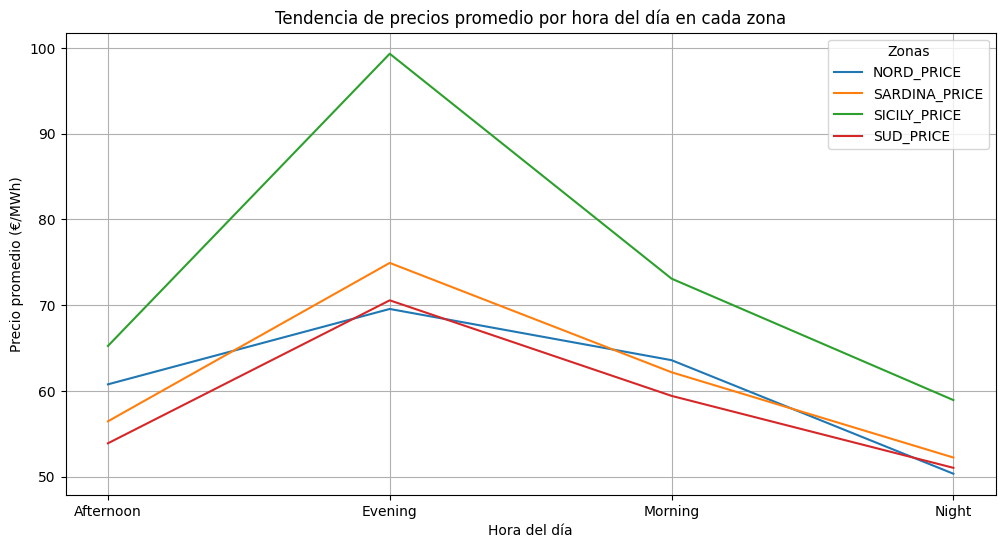

In [42]:
# Crear un gráfico de líneas para las zonas de precio
plt.figure(figsize=(12, 6))
for zona in zonas_precio:
    precios_por_hora = df.groupby('TIME_OF_DAY')[zona].mean()
    plt.plot(precios_por_hora.index, precios_por_hora.values, label=zona)

# Configuración del gráfico
plt.title('Tendencia de precios promedio por hora del día en cada zona')
plt.xlabel('Hora del día')
plt.ylabel('Precio promedio (€/MWh)')
plt.legend(title="Zonas")
plt.grid(True)
plt.show()

In [ ]:
# PREGUNTA 6 ¿Qué zona tiene el precio promedio más alto y cuál el más bajo a lo largo de todos los años?
# Crear un diccionario para almacenar los resultados
resultados_zonas = {}

# Iterar sobre las zonas de precios
for zona in zonas_precio:
    # Calcular el precio promedio a lo largo de todos los años
    precio_promedio = df[zona].mean()
    # Almacenar el resultado
    resultados_zonas[zona] = precio_promedio

# Convertir los resultados en un DataFrame para mejor visualización
resultados_zonas_df = pd.DataFrame.from_dict(resultados_zonas, orient='index', columns=['Precio Promedio'])

# Encontrar la zona con el precio promedio más alto y más bajo
zona_max_precio = resultados_zonas_df['Precio Promedio'].idxmax()  # Índice del precio máximo
zona_min_precio = resultados_zonas_df['Precio Promedio'].idxmin()  # Índice del precio mínimo
precio_max = resultados_zonas_df['Precio Promedio'].max()  
precio_min = resultados_zonas_df['Precio Promedio'].min()  

# Mostrar los resultados
print("Precio promedio por zona a lo largo de todos los años:")
print(resultados_zonas_df)
print(f"\nLa zona con el precio promedio más alto es {zona_max_precio} con un precio de {precio_max:.2f} €/MWh.")
print(f"La zona con el precio promedio más bajo es {zona_min_precio} con un precio de {precio_min:.2f} €/MWh.")

Precio promedio por zona a lo largo de todos los años:
               Precio Promedio
NORD_PRICE           61.063504
SARDINA_PRICE        61.447919
SICILY_PRICE         74.149028
SUD_PRICE            58.727285

La zona con el precio promedio más alto es SICILY_PRICE con un precio de 74.15 €/MWh.
La zona con el precio promedio más bajo es SUD_PRICE con un precio de 58.73 €/MWh.


In [47]:
# PREGUNTA 7 7.	¿Cómo se relaciona el precio único nacional con los precios por zona? (¿Son similares o hay grandes diferencias?)

# Calcular el precio promedio del precio único nacional
precio_nacional_promedio = df['UNIQUE_NATIONAL_PRICE'].mean()

# Mostrar los resultados de las zonas y el precio promedio nacional
print("Precio promedio por zona:")
print(resultados_zonas_df)

print(f"\nPrecio promedio del precio único nacional: {precio_nacional_promedio:.2f} €/MWh")

# Comparar la diferencia entre el precio único nacional y las zonas
diferencias = resultados_zonas_df['Precio Promedio'] - precio_nacional_promedio

# Mostrar las diferencias
print("\nDiferencia entre el precio único nacional y las zonas:")
print(diferencias)

# Responder a la pregunta de si hay grandes diferencias
if any(diferencias.abs() > 10):  # Si alguna diferencia es mayor a 10 €/MWh
    print("\nExisten diferencias significativas entre el precio único nacional y los precios por zona.")
    
    # Encontrar la zona con la diferencia más grande
    zona_con_gran_diferencia = diferencias.abs().idxmax()  # Zona con la mayor diferencia
    diferencia_maxima = diferencias.loc[zona_con_gran_diferencia]  # Valor de esa diferencia
    print(f"La zona con la mayor diferencia es {zona_con_gran_diferencia} con una diferencia de {diferencia_maxima:.2f} €/MWh.")
else:
    print("\nLas diferencias entre el precio único nacional y los precios por zona son pequeñas.")

Precio promedio por zona:
               Precio Promedio
NORD_PRICE           61.063504
SARDINA_PRICE        61.447919
SICILY_PRICE         74.149028
SUD_PRICE            58.727285

Precio promedio del precio único nacional: 61.75 €/MWh

Diferencia entre el precio único nacional y las zonas:
NORD_PRICE       -0.686648
SARDINA_PRICE    -0.302233
SICILY_PRICE     12.398876
SUD_PRICE        -3.022866
Name: Precio Promedio, dtype: float64

Existen diferencias significativas entre el precio único nacional y los precios por zona.
La zona con la mayor diferencia es SICILY_PRICE con una diferencia de 12.40 €/MWh.
